![](Captura.PNG)

# Inteligencia Artificial
## Arboles de decisión Dataset Iris

## Nombre docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Alan Aarón Martínez Castillo

### Aspectos básicos/situación

En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.


Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?

**Respuesta:Los factores que influyen son: La clase del boleto del pasajero, el genero del pasajero, la edad del pasajero, SibSp, Fare.**


In [4]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [5]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

**Respuesta:Nos faltan algunas edades , cabinas y un dato en Embarked.**

In [6]:
#Code cell 3
#view the first few rows of the data
training.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [7]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [8]:
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [9]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [10]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
#answers may vary
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,0,3,"Baccos, Mr. Raffull",0,20.000000,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,29.970867,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.000000,0,0,LINE,0.0000,NaN,S


In [11]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null int64
Age            915 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

**Respuesta:La media usando el comando:
training["Age"].fillna(training["Age"].mean(), inplace=True)**

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [12]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [13]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [14]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

Evalúe el modelo.

Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [15]:
#code cell 11
clf_train.score(X_input,y_target)

0.8163934426229508

### Paso 6: Visualizar el árbol

In [16]:
clasificacion=['NO SOBREVIVE','SOBREVIVE']

In [17]:
#code cell 12
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,class_names=clasificacion)


In [18]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng titanic.dot -o titanic.png

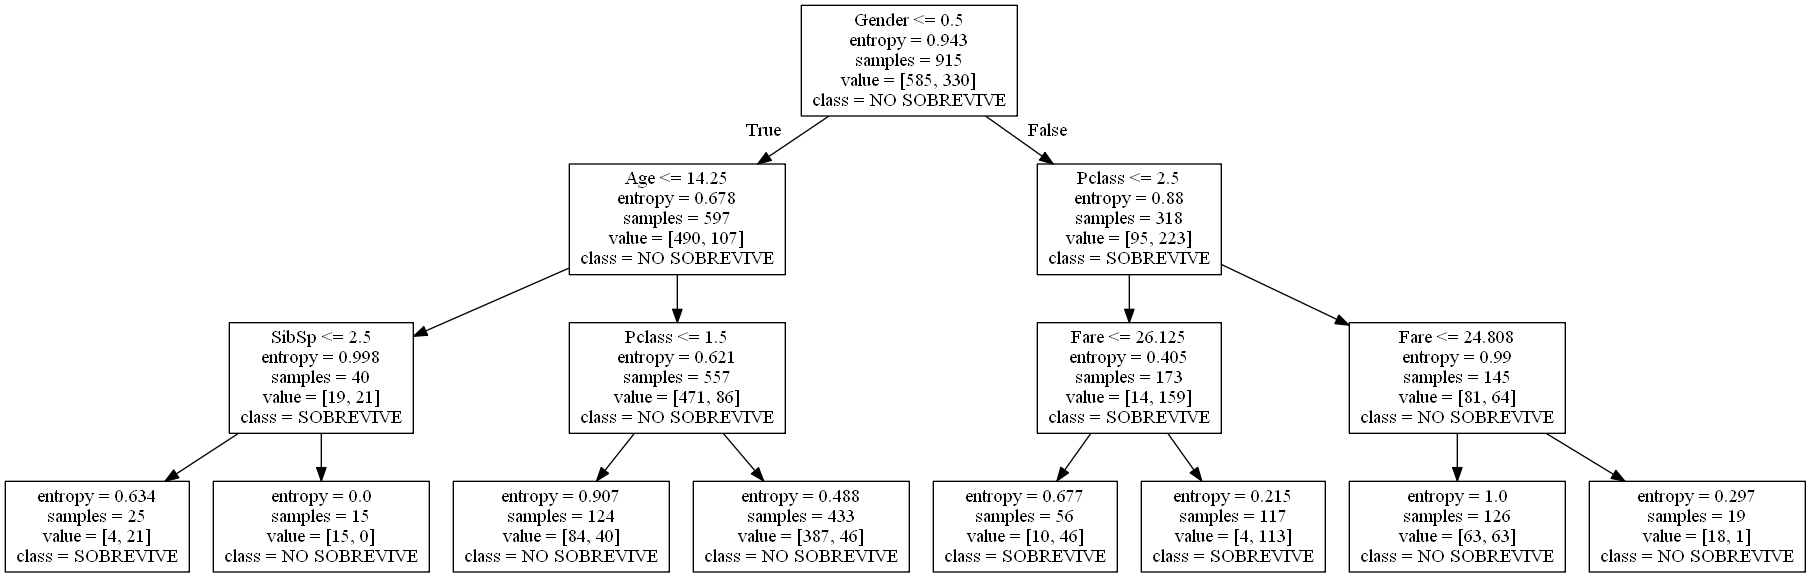

In [19]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")


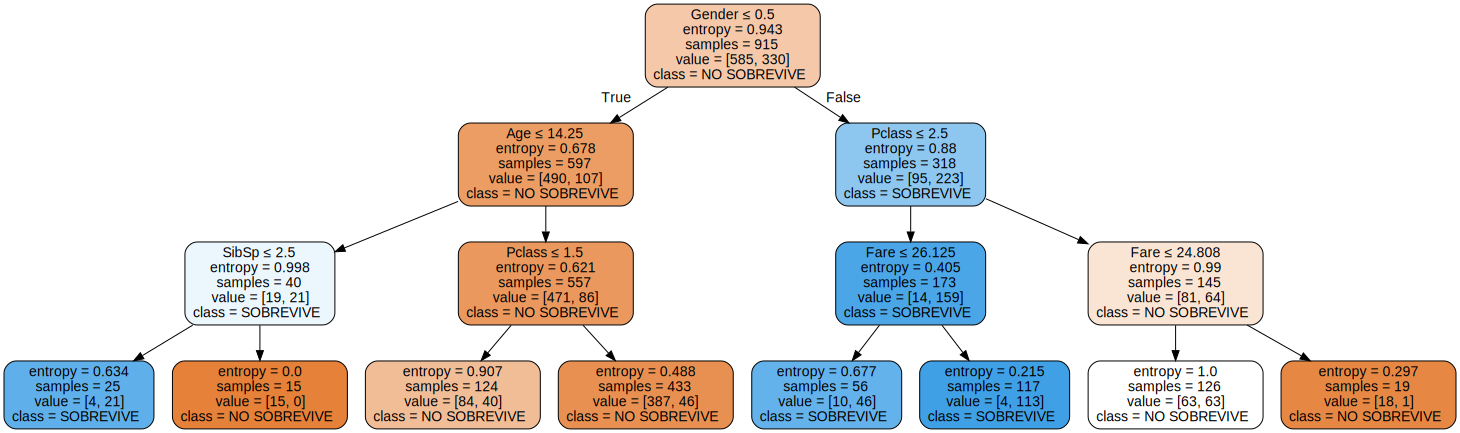

In [20]:
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("TitanicColor", format='png')
graph

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**Respuesta:Quienes sobrevivian o tenian mas probabilidades de sobrevivir tenian en comun: 
Edad <=14
Clase>1.5
Genero= Male**

**El grupo con menos sobrevivian son:
Edad >14
Genero= Hombre
Clase > 1.5
Fare>= 26**

### Parte 2: Aplicar el modelo del árbol de decisiones

In [18]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [19]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("titanic-test.csv")

¿Cuántos registros hay en el conjunto de datos?

**Respuesta: 915**

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta: En realidad solamente en algunos casos la edad, la cual fue sustiuida. en otros casos es el genero pero en este caso tenemos que cambiar los valores que tenemos en 0 y 1. Las otras variables pueden ser Survived,Pclass,Gender,Age,SibSp,Fare**

In [20]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [21]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)


In [22]:
#code cell 18
#verify the data preparation steps. Enter and run both methods from here, by entering and running one and then the other.
testing.head(10)


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


In [23]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

#### Hacer predicciones con el metodo predict del clasificador

Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [24]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [25]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc

0.7588832487309645

### Parte 3: Evaluar el modelo del árbol de decisiones

In [26]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe

¿Cuántos registros hay en el conjunto de datos?

**Respuesta:915**

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta: En realidad solamente en algunos casos la edad, la cual fue sustiuida. en otros casos es el genero pero en este caso tenemos que cambiar los valores que tenemos en 0 y 1. Las otras variables pueden ser Survived,Pclass,Gender,Age,SibSp,Fare**


In [27]:
#code cell 23
#Label the gender variable with 0 and 1
#code cell 4
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [28]:
#code cell 24
#replace missing Age values with the mean age


#display the first few rows of the data set
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [29]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [31]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [32]:
type(X_train)

numpy.ndarray

In [33]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


In [34]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)


Training score = 0.8201530612244898 Testing score = 0.8053435114503816


#### Parte 4 para estudio adicional (opcional)

## Tarea.

In [35]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [36]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [37]:
training.dropna(subset = ["Age"], axis = 0, inplace = True)

In [38]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.0,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
11,12,0,2,"Maybery, Mr. Frank Hubert",0,40.0,0,0,239059,16.0000,NaN,S
12,13,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,C
13,14,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,S


In [39]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 913
Data columns (total 12 columns):
PassengerId    738 non-null int64
Survived       738 non-null int64
Pclass         738 non-null int64
Name           738 non-null object
Gender         738 non-null int64
Age            738 non-null float64
SibSp          738 non-null int64
Parch          738 non-null int64
Ticket         738 non-null object
Fare           738 non-null float64
Cabin          187 non-null object
Embarked       737 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 75.0+ KB


In [40]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [41]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [42]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [43]:
#code cell 11
clf_train.score(X_input,y_target)

0.8252032520325203

In [54]:
#code cell 12
Clasificacion=['NO SOBREVIVE','SOBREVIVE']
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)


In [55]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng titanic2.dot -o titanic2.png



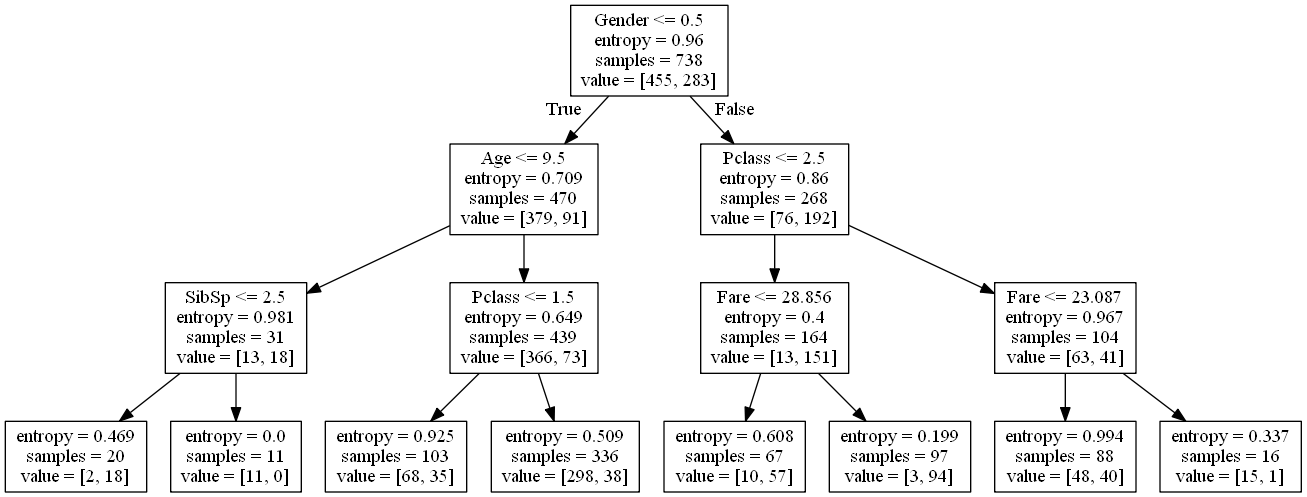

In [50]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("titanic2.png")

## Reflexion

Que diferencia se encontro al ejecutar el codigo sin los valores nulos de la edad.
1. Fue mas efectivo. ¿Por que?

**Respuesta: Si tomamos en cuenta los datos reales que tenemos el segundo metodo es mas efectivo puesto que utiliza los valores reales de cada pasajero. 
En el otro caso tuvimos que sustituir los valores faltantes con la media, lo cual nos pude dar un resultado aproximado tambien pero no 100% exacto con datos 100% correctos.**
2. Que porcentaje se obtuvo.

**Respuesta: En el primero:0.7588832487309645 En el segundo: 0.8252032520325203**
3. Conclusiones.

**Respuesta: Es importante ver como ha evolucionado el conocimiento del ser humano al punto de poder realizar una prediccion de los supervivientes de este accidente tomando en cuenta unas pocas variables. Me parece interesante el como esto mismo se puede aplicar pero para prevenir dichos accidentes.**